### <center>Degenerate kernel method for solving the second kind Fredholm equation

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import quad

$\lambda = 1, ~K(x, s) = xs, ~f(x) = x, ~a = -1, ~b = 1$
$K(x, s) = xs => \alpha_1(x) = x, \beta_1(s) = s, m = 1$

In [2]:
def alpha(xx):
    return np.array([xx])


def beta(xx):
    return np.array([xx])

def f(xx):
    return xx


def degenerate_kernels_method(x_, lambda_, a_, b_, alpha_func, beta_func, f_func):
    m = len(alpha([0]))
    r = np.zeros(m)
    
    for i in range(m):
        integrand_r = lambda xx: beta_func(xx)[i] * f(xx)
        r[i], _ = quad(integrand_r, a_, b_)
    M = np.zeros((m, m))
    for i in range(m):
        for j in range(m):
            integrand_M = lambda xx: beta_func(xx)[i] * alpha_func(xx)[j]
            M[i, j] = quad(integrand_M, a_, b_)[0]
            M[i, j] *= -lambda_
        M[i, i] += 1
    c = np.linalg.solve(M, r)
    
    y = np.zeros_like(x_)
    for i in range(x_.shape[0]):
        y[i] = sum(c[j] * alpha_func(x_[i])[j] for j in range(m)) * lambda_ + f(x_[i])
    return y

In [3]:
n = 10
a, b = -1, 1
lambda_ = 1
x = np.linspace(a, b, n + 1)

In [4]:
solution = degenerate_kernels_method(x, lambda_, a, b, alpha, beta, f)
exact = 3 * x
discrepancy = abs(solution - exact)
print(f"Max_absolute_discrepancy: {discrepancy.max()}")

Max_absolute_discrepancy: 4.440892098500626e-16


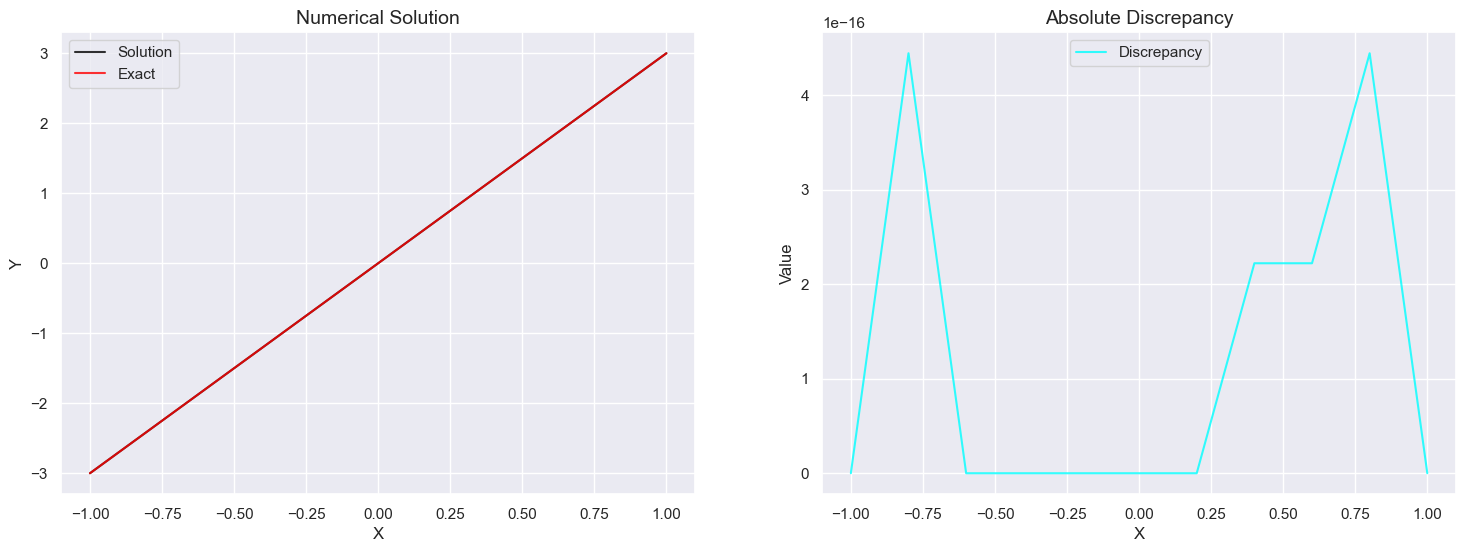

In [5]:
sns.set()

fig, axs = plt.subplots(1, 2, figsize=(18, 6))
sns.lineplot(ax=axs[0], y=solution, x=x, label="Solution", alpha=0.8, c="black");
sns.lineplot(ax=axs[0], y=exact, x=x, label="Exact", alpha=0.8, c="red");
axs[0].set_xlabel("X", fontsize=12);
axs[0].set_ylabel("Y", fontsize=12);
axs[0].set_title("Numerical Solution", fontsize=14);
axs[0].legend();

sns.lineplot(ax=axs[1], y=discrepancy, x=x, label="Discrepancy", alpha=0.8, c="cyan");
axs[1].set_xlabel("X", fontsize=12);
axs[1].set_ylabel("Value", fontsize=12);
axs[1].set_title("Absolute Discrepancy", fontsize=14);
axs[1].legend();

plt.show()